In [ ]:
# !apt-get install fonts-nanum* -qq
# # 다운받은 후 코랩 런타임 다시 시작
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# !pip install koreanize-matplotlib

In [ ]:
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import koreanize_matplotlib


In [ ]:
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kstest, shapiro
from scipy.stats import skew
from sklearn.cluster import KMeans

import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [ ]:
font_path = './temp/malgun.ttf' # local
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False

all_data_raw = pd.read_csv('dataset_food_final.csv', index_col = 0)
all_data = all_data_raw.copy()
all_data[:1]

,Attraction,Category,type,Category_Map,Good_Point,Selected_People,Participants
0,채그로,음식,cafe,시설 및 분위기,뷰가 좋아요,146.0,201


In [ ]:
# path = '/content/drive/MyDrive/my_pjt(주간)/temp/malgun.ttf'
# font_name = mpl.font_manager.FontProperties(fname=path).get_name()
# plt.rcParams['font.family'] = font_name

In [ ]:
# %cd /content/drive/MyDrive/my_pjt(주간)

In [ ]:
df = pd.read_csv('./dataset_food_final.csv', index_col = 0)

In [ ]:
df

,Attraction,Category,type,Category_Map,Good_Point,Selected_People,Participants
0,채그로,음식,cafe,시설 및 분위기,뷰가 좋아요,146.0,201
1,채그로,음식,cafe,시설 및 분위기,집중하기 좋아요,62.0,201
2,채그로,음식,cafe,시설 및 분위기,읽을만한 책이 많아요,61.0,201
3,채그로,음식,cafe,시설 및 분위기,인테리어가 멋져요,60.0,201
4,채그로,음식,cafe,음식의 속성,커피가 맛있어요,39.0,201
...,...,...,...,...,...,...,...
10528,h450,음식,west,시설 및 분위기,아늑해요,2.0,260
10529,h450,음식,west,가격 및 가치,메뉴 구성이 알차요,2.0,260
10530,h450,음식,west,음식의 속성,건강한 맛이에요,2.0,260
10531,h450,음식,west,음식의 속성,음료가 맛있어요,1.0,260


In [ ]:
def making_pivot_category(df):
   pivot_df = df.pivot_table(index='Attraction',columns='Category_Map',values='Selected_People',aggfunc='sum',fill_value=0)
   # pivot_df['Sum'] = pivot_df['가격 및 가치'] + pivot_df['서비스'] + pivot_df['시설 및 분위기'] + pivot_df['음식의 속성']
   return pivot_df

In [ ]:
food_pivot = making_pivot_category(df)

food_pivot

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성
Attraction,,,,
1940금문,6.0,43.0,79.0,210.0
63뷔페 파빌리온,2372.0,1974.0,7101.0,6137.0
BK볏짚 우대갈비 장안동본점,62.0,285.0,551.0,887.0
RSG 성수,0.0,2.0,17.0,13.0
WANGTHAI,31.0,173.0,342.0,567.0
...,...,...,...,...
황금정원,172.0,254.0,1520.0,2009.0
황생가칼국수,323.0,921.0,1891.0,5523.0
황토추어탕,224.0,154.0,273.0,750.0


In [ ]:
food_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 1940금문 to 히라메키
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   가격 및 가치   450 non-null    float64
 1   서비스       450 non-null    float64
 2   시설 및 분위기  450 non-null    float64
 3   음식의 속성    450 non-null    float64
dtypes: float64(4)
memory usage: 17.6+ KB


In [ ]:
# 각 속성마다 450개 row씩 있음
food_pivot.describe()

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성
count,450.000000,450.000000,450.000000,450.000000
mean,147.828889,234.464444,741.955556,1336.784444
std,288.849179,314.717641,1297.952116,2278.790437
min,0.000000,2.000000,6.000000,10.000000
25%,23.000000,62.250000,122.250000,258.000000
50%,50.500000,137.000000,310.500000,634.500000
75%,140.250000,262.500000,795.250000,1398.500000
max,2372.000000,2992.000000,10410.000000,30767.000000


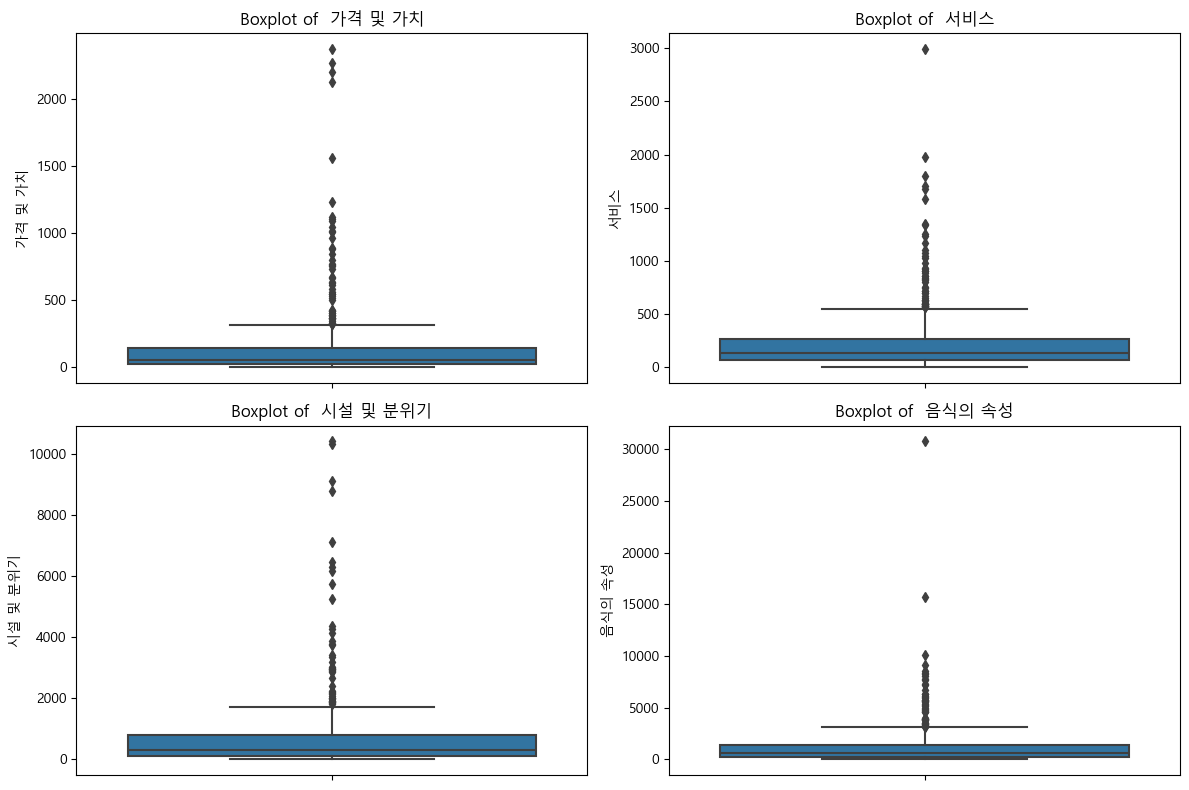

In [ ]:
# 각 변수에 대해 박스플랏 그리기
plt.figure(figsize=(12, 8))
for i, column in enumerate(food_pivot.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=food_pivot[column])
    plt.title(f'Boxplot of  {column}')

plt.tight_layout()
plt.show()

In [ ]:
# 각 변수의 합을 새로운 열로 추가
food_pivot['sum'] = food_pivot.sum(axis=1)

food_pivot.describe()

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,sum
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,147.828889,234.464444,741.955556,1336.784444,2461.033333
std,288.849179,314.717641,1297.952116,2278.790437,3791.089301
min,0.000000,2.000000,6.000000,10.000000,22.000000
25%,23.000000,62.250000,122.250000,258.000000,523.500000
50%,50.500000,137.000000,310.500000,634.500000,1190.500000
75%,140.250000,262.500000,795.250000,1398.500000,2744.000000
max,2372.000000,2992.000000,10410.000000,30767.000000,44821.000000


총합에 대해 박스플랏 그리기

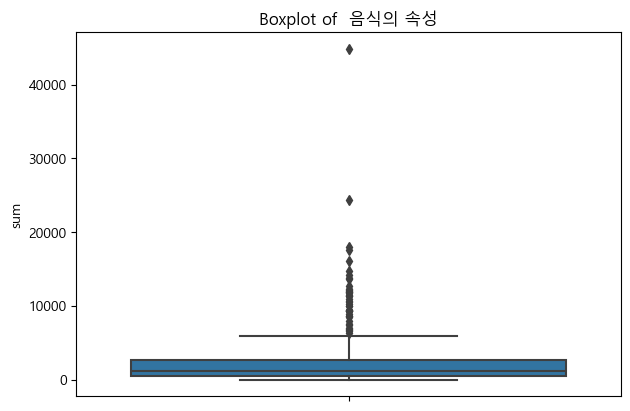

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, i)
sns.boxplot(y=food_pivot['sum'])
plt.title(f'Boxplot of  {column}')

plt.tight_layout()
plt.show()

# 사분위수 기준으로 target 설정

In [ ]:
# 각 변수에 대해 4분위를 기반으로 target 변수 생성
def assign_target(value, quantiles):
    if value <= quantiles[0.25]: # 25% 보다 작은 거는 0(댓글이 적은)
        return 0
    elif value >= quantiles[0.75]:  # 75% 보다 큰 거는 2(댓글이 많음)
        return 2
    else:
        return 1

# 각 변수에 대해 사분위수 계산 및 target 변수 할당
for column in food_pivot.columns[:-1]:  # 마지막 'sum' 열 제외
    quantiles = food_pivot[column].quantile([0.25, 0.75])
    food_pivot['quantiles_target'] = food_pivot[column].apply(assign_target, args=(quantiles,))

# 결과 출력
food_pivot.head()

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,sum,quantiles_target
Attraction,,,,,,
1940금문,6.0,43.0,79.0,210.0,338.0,0
63뷔페 파빌리온,2372.0,1974.0,7101.0,6137.0,17584.0,2
BK볏짚 우대갈비 장안동본점,62.0,285.0,551.0,887.0,1785.0,1
RSG 성수,0.0,2.0,17.0,13.0,32.0,0
WANGTHAI,31.0,173.0,342.0,567.0,1113.0,1


In [ ]:
food_pivot['quantiles_target'].value_counts()

quantiles_target
1    223
0    114
2    113
Name: count, dtype: int64

quantiles_target의 pairplot

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

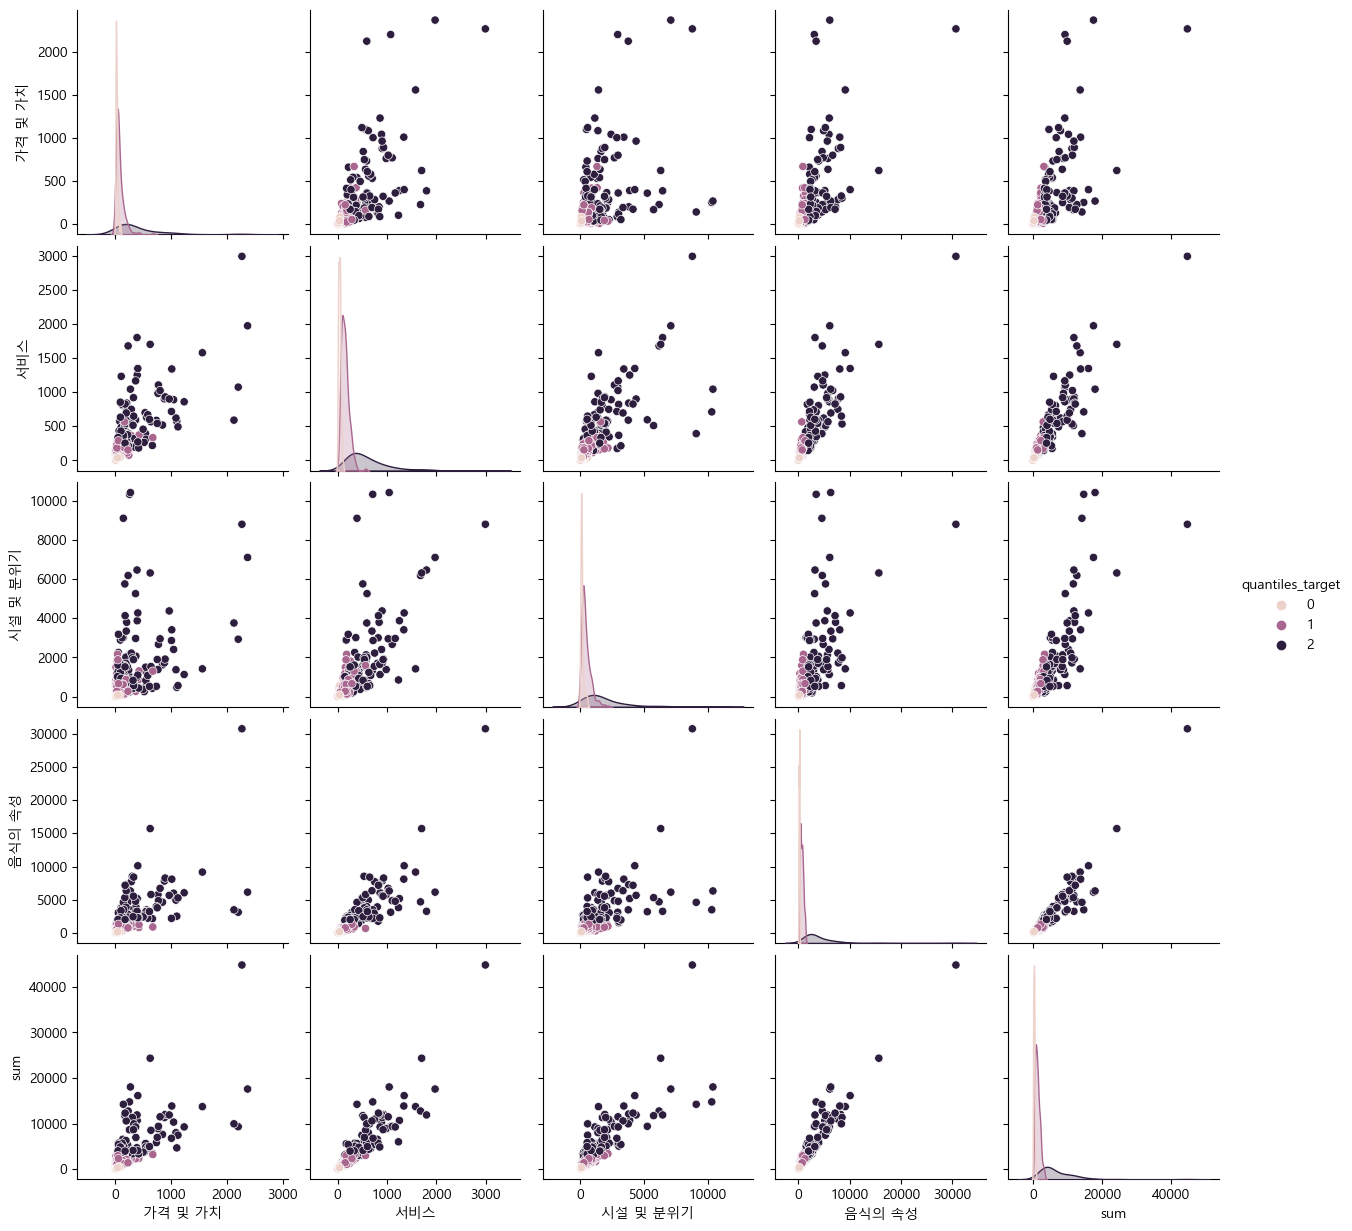

In [ ]:
sns.pairplot(food_pivot, hue="quantiles_target")
plt.show()

# 군집을 이용해 target 설정(로그 변환 전)

In [ ]:
food_pivot.columns

Index(['가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성', 'sum', 'quantiles_target'], dtype='object', name='Category_Map')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

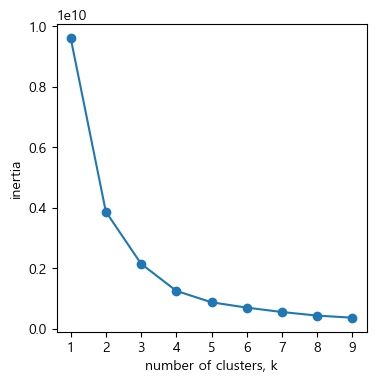

In [ ]:
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(food_pivot)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

군집 3개

In [ ]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 )# 클러스터 갯수

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(food_pivot) # unsupervised learning

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(food_pivot) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


             0            1            2             3             4  \
0    87.921569   159.198529   445.181373    804.583333   1496.884804   
1   692.219512   916.195122  3498.878049   5915.024390  11022.317073   
2  2270.000000  2992.000000  8792.000000  30767.000000  44821.000000   

          5             6             7  
0  0.894608 -3.747003e-16 -3.747003e-16  
1  2.000000  1.000000e+00  1.000000e+00  
2  2.000000  2.000000e+00  2.000000e+00  
[0 1 0 0 0 0 0 0 0 0]


로그 변환 전 군집 별 target 설정

In [ ]:
# 원래 데이터에 예측된 군집 붙이기
food_pivot = food_pivot.copy()
food_pivot['clust_target_before_log'] = pred
food_pivot.head()

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,sum,quantiles_target,clust_target_before_log,clust_target_2_before_log
Attraction,,,,,,,,
1940금문,6.0,43.0,79.0,210.0,338.0,0,0,0
63뷔페 파빌리온,2372.0,1974.0,7101.0,6137.0,17584.0,2,1,1
BK볏짚 우대갈비 장안동본점,62.0,285.0,551.0,887.0,1785.0,1,0,0
RSG 성수,0.0,2.0,17.0,13.0,32.0,0,0,0
WANGTHAI,31.0,173.0,342.0,567.0,1113.0,1,0,0


군집 2개

In [ ]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 2 )# 클러스터 갯수

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(food_pivot) # unsupervised learning

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred2 = clust_model.predict(food_pivot) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


            0            1            2            3             4        5  \
0   92.765133   165.014528   464.542373   837.600484   1559.922518  0.90799   
1  762.459459  1009.675676  3838.486486  6908.756757  12519.378378  2.00000   

          6         7  
0  0.012107  0.012107  
1  1.027027  1.027027  
[0 1 0 0 0 0 0 0 0 0]


In [ ]:
# 원래 데이터에 예측된 군집 붙이기
food_pivot = food_pivot.copy()
food_pivot['clust_target_2_before_log'] = pred2
food_pivot.head()

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,sum,quantiles_target,clust_target_before_log,clust_target_2_before_log
Attraction,,,,,,,,
1940금문,6.0,43.0,79.0,210.0,338.0,0,0,0
63뷔페 파빌리온,2372.0,1974.0,7101.0,6137.0,17584.0,2,1,1
BK볏짚 우대갈비 장안동본점,62.0,285.0,551.0,887.0,1785.0,1,0,0
RSG 성수,0.0,2.0,17.0,13.0,32.0,0,0,0
WANGTHAI,31.0,173.0,342.0,567.0,1113.0,1,0,0


원본데이터 사분위수 기준으로 pairplot

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

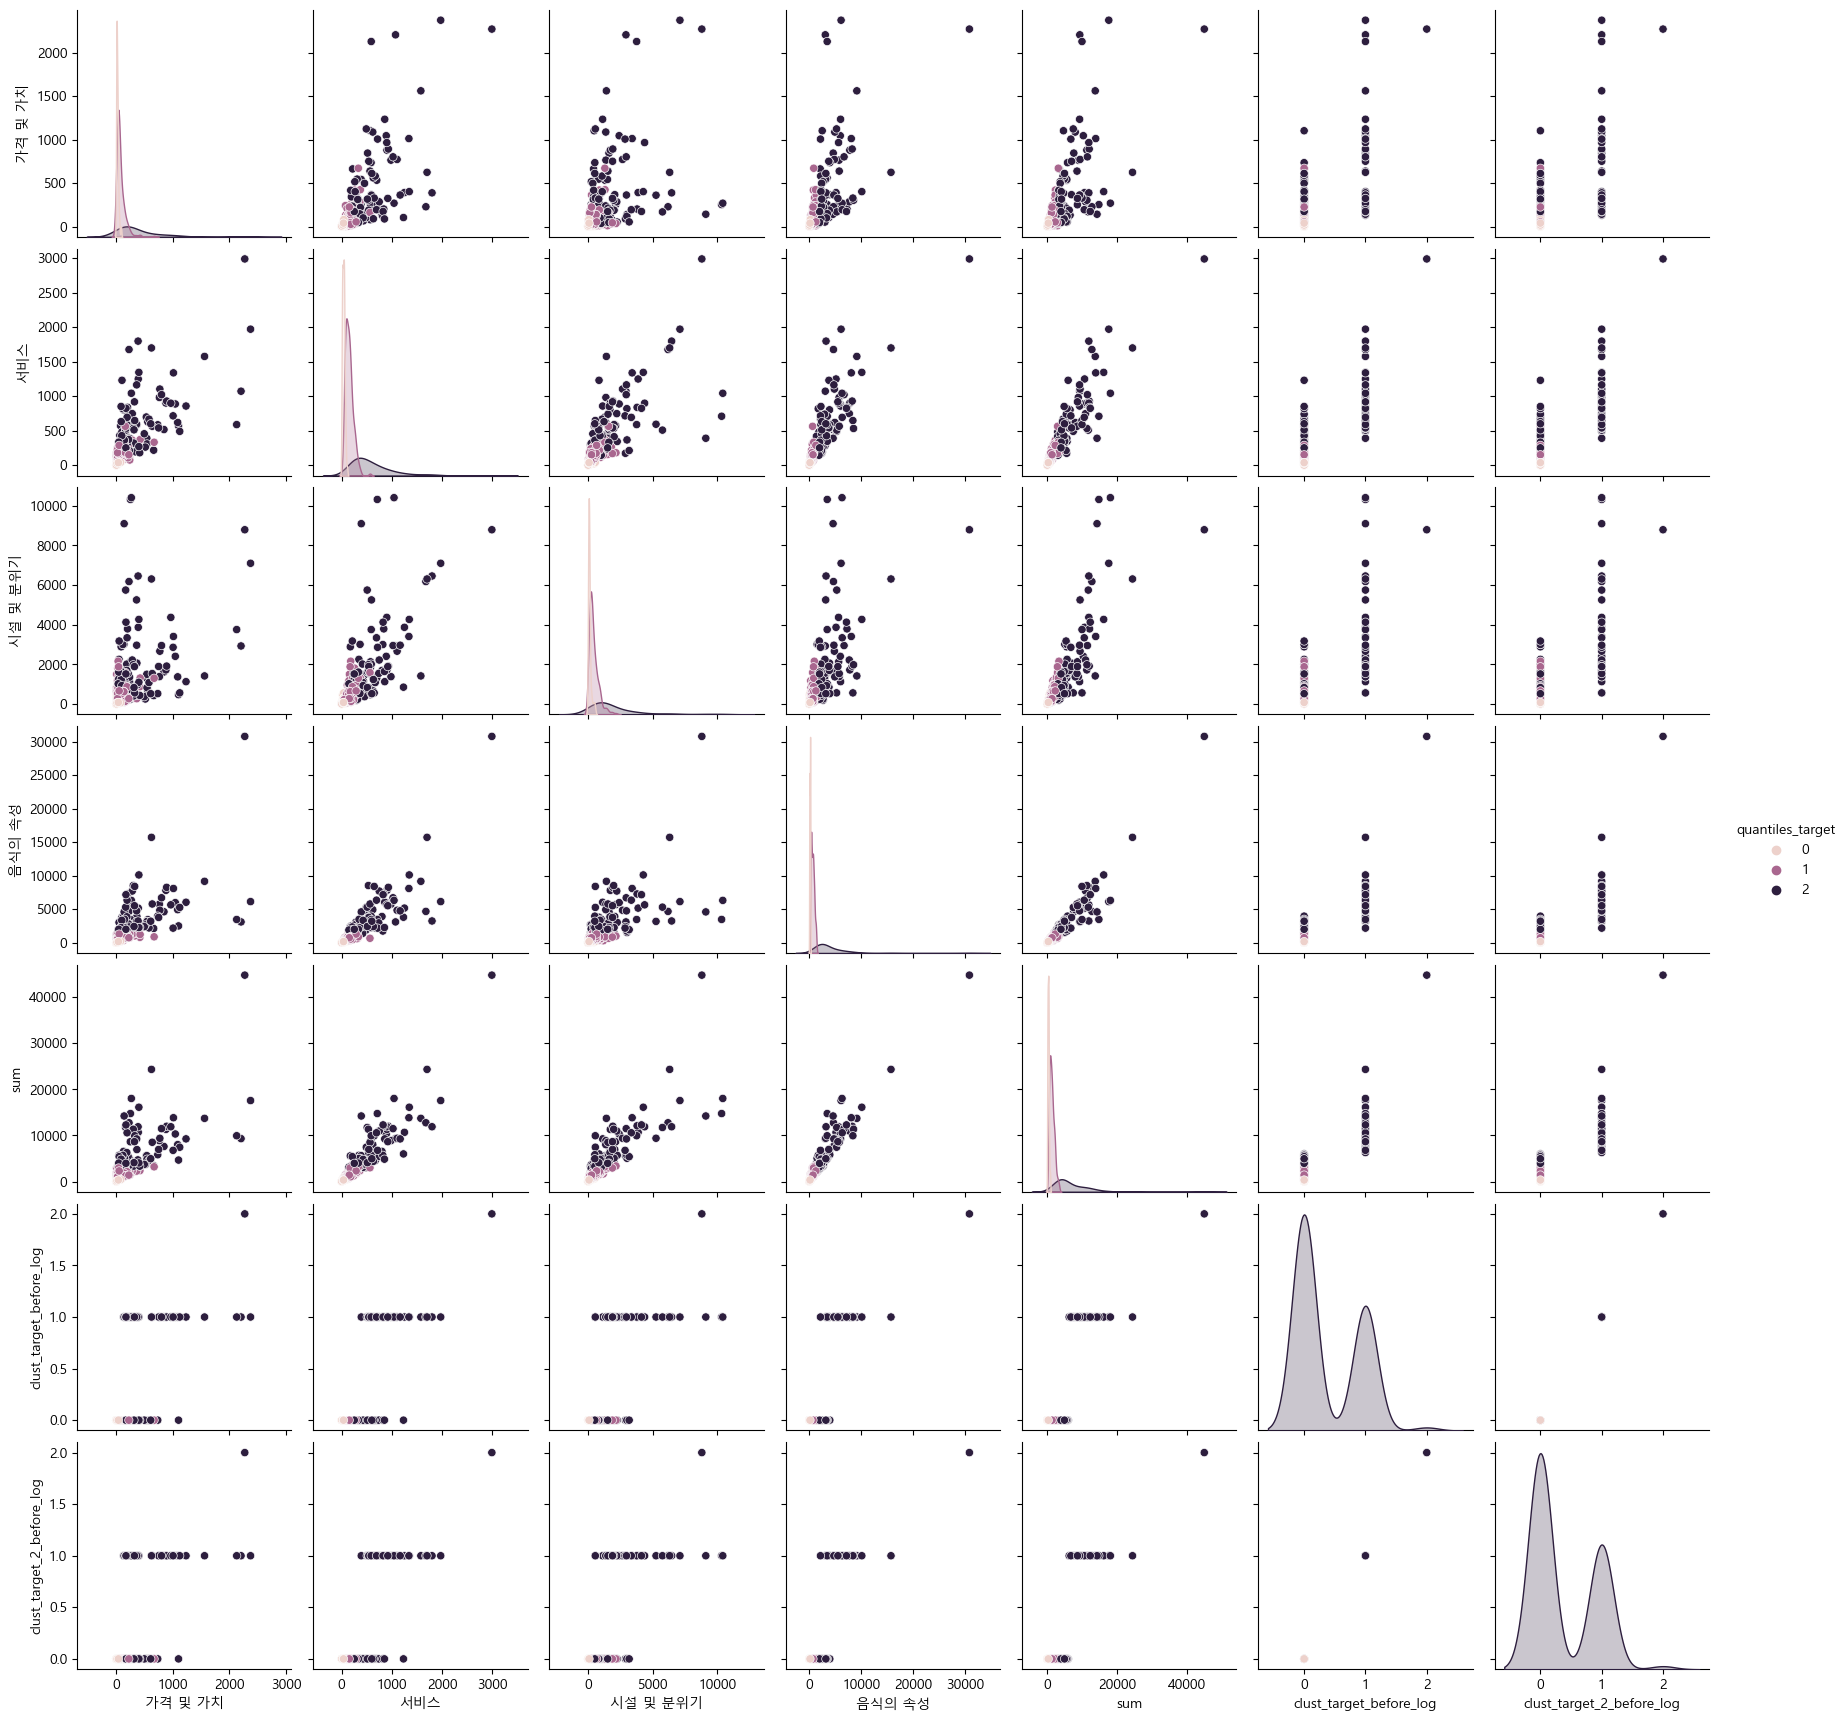

In [ ]:
sns.pairplot(food_pivot, hue="quantiles_target")
plt.show()

원본데이터 3개 군집 기준으로 pairplot

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

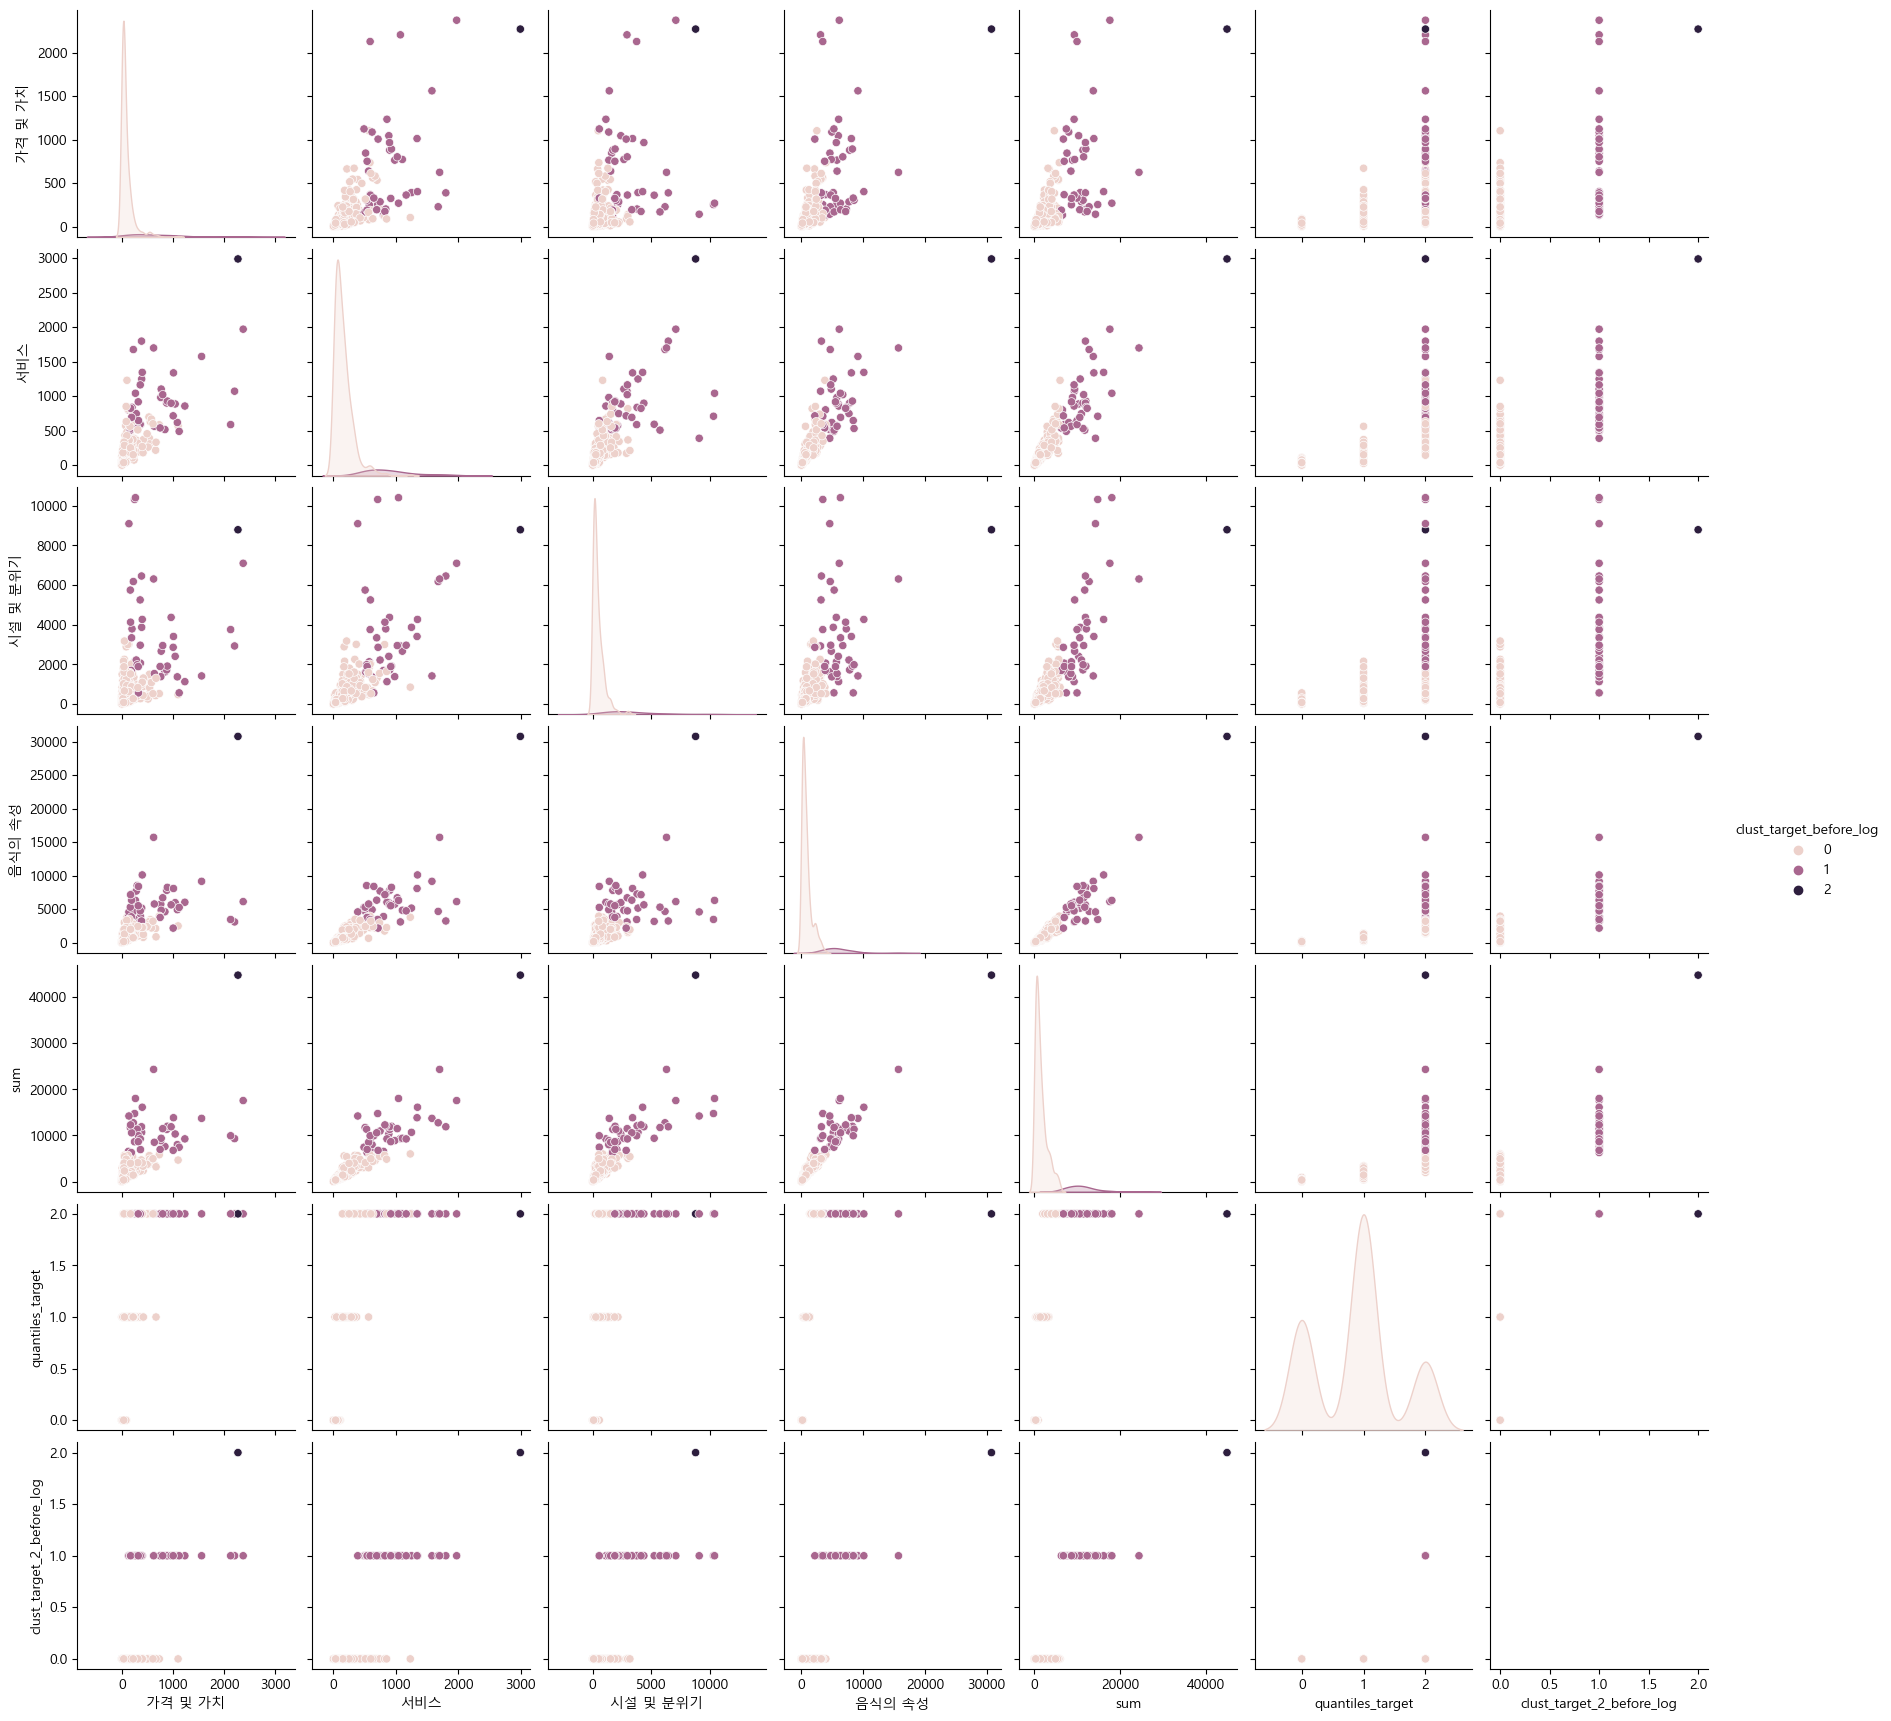

In [ ]:
sns.pairplot(food_pivot, hue="clust_target_before_log")
plt.show()

원본데이터 2개 군집 기준으로 pairplot

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

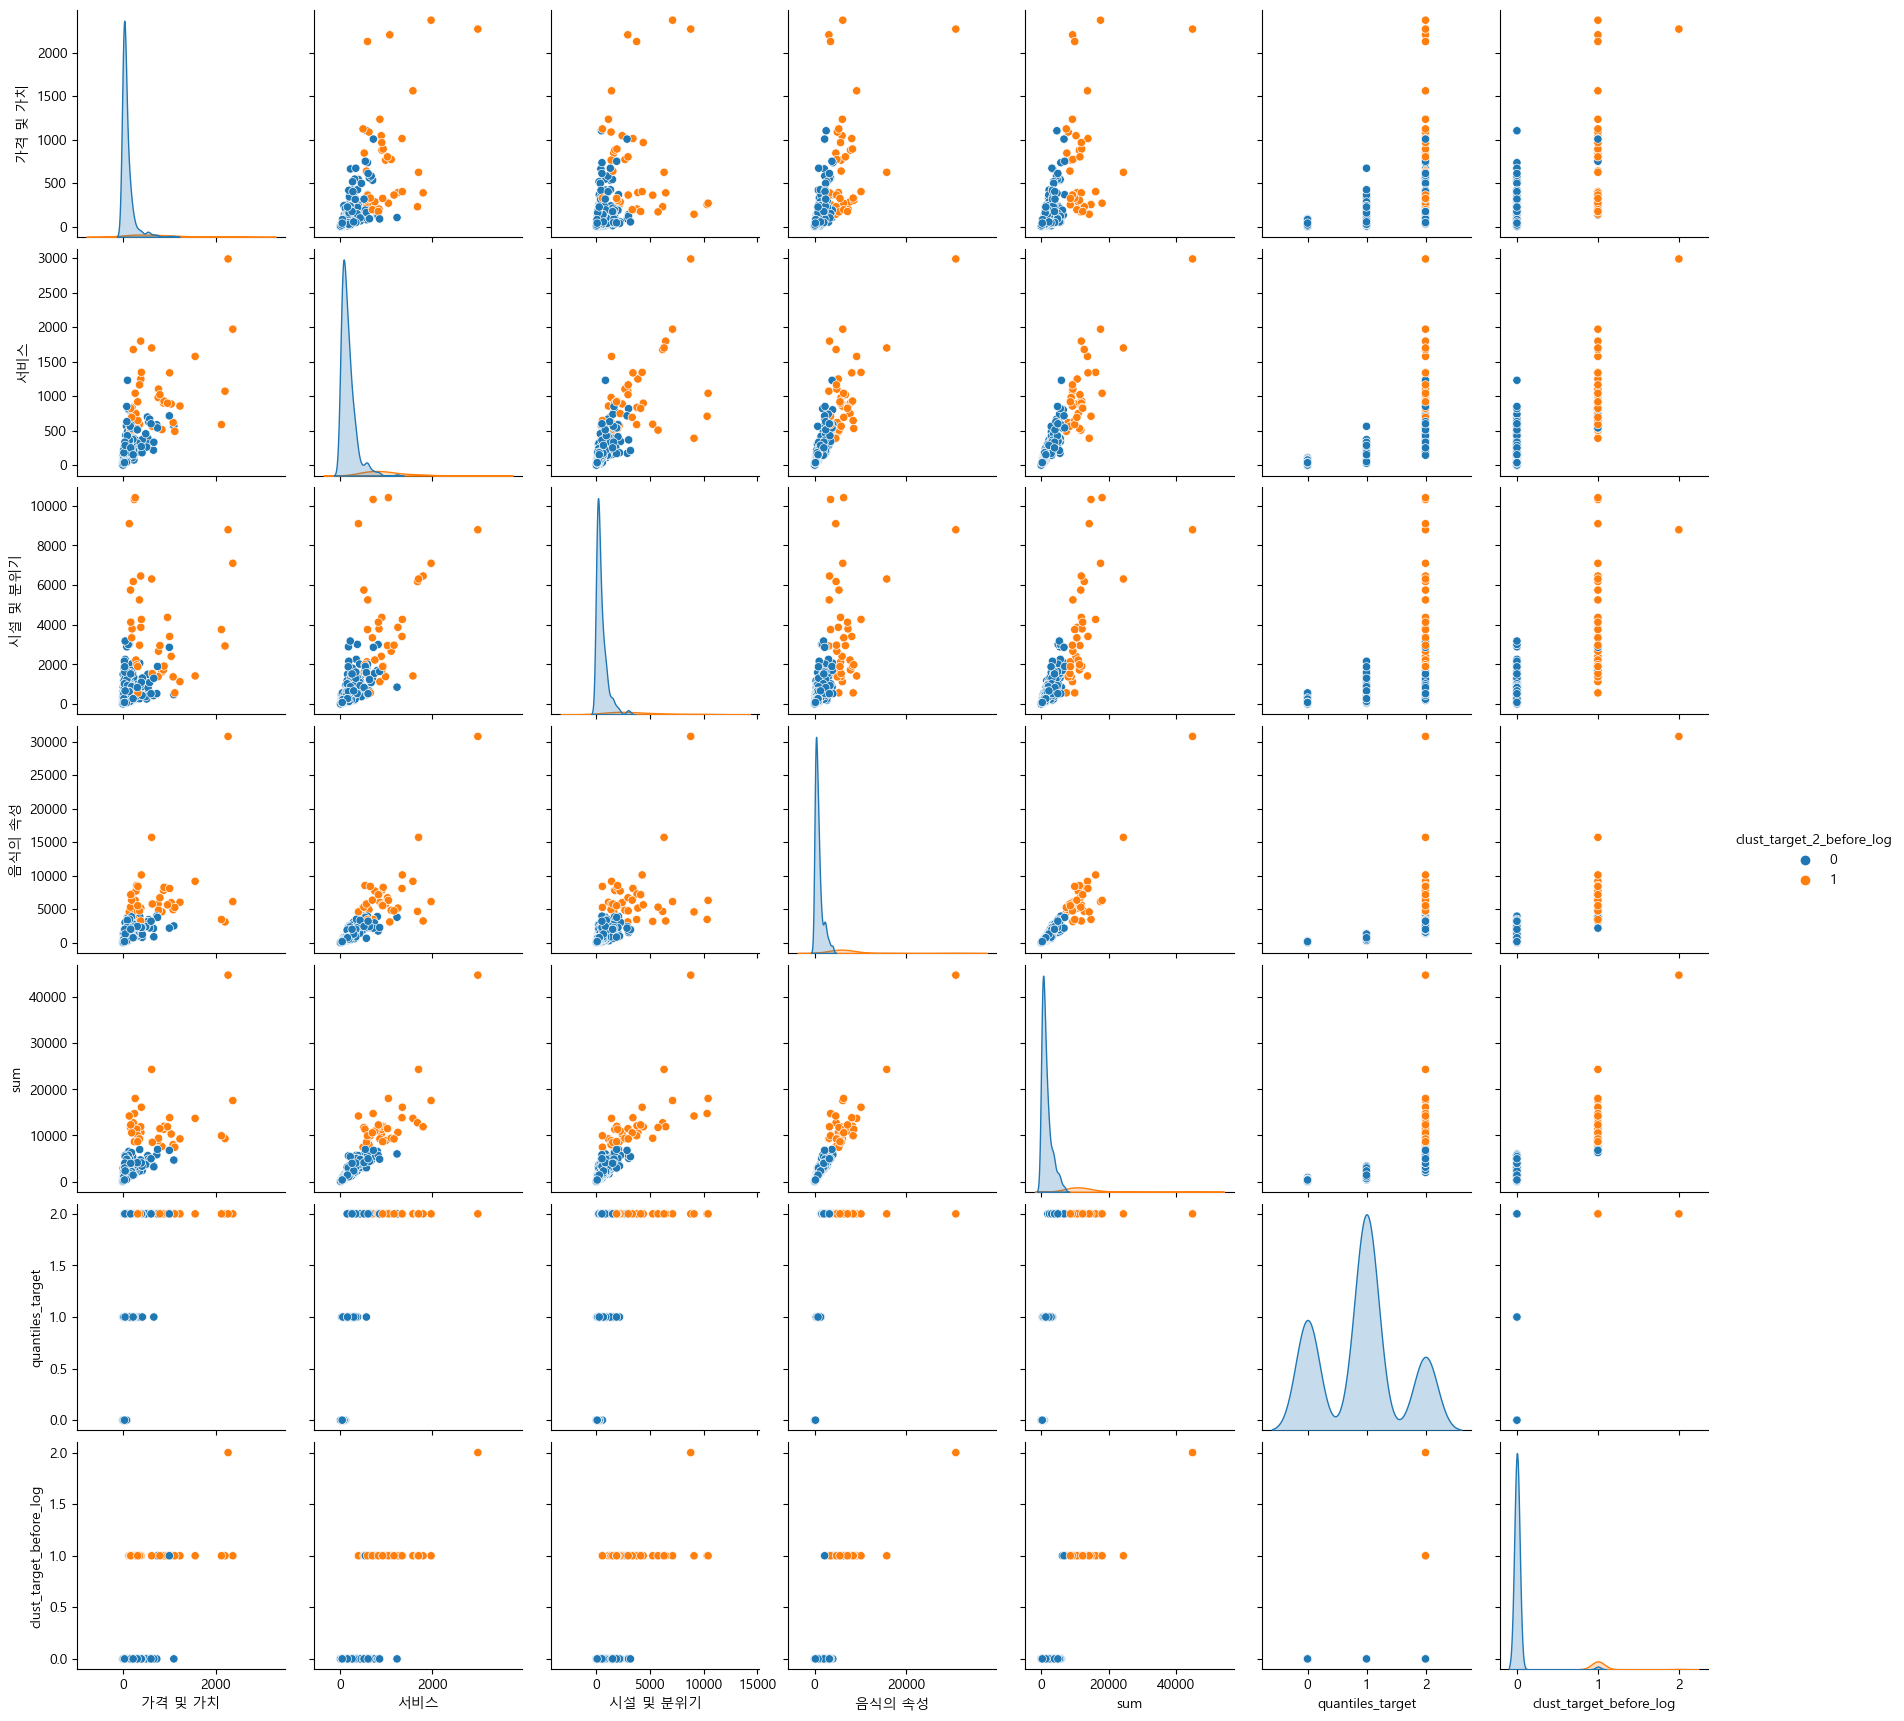

In [ ]:
sns.pairplot(food_pivot, hue="clust_target_2_before_log")
plt.show()

In [ ]:
food_pivot['quantiles_target'].value_counts()

quantiles_target
1    223
0    114
2    113
Name: count, dtype: int64

In [ ]:
food_pivot['clust_target_2_before_log'].value_counts()

clust_target_2_before_log
0    413
1     37
Name: count, dtype: int64

In [ ]:
# 군집 3개
food_pivot['clust_target_before_log'].value_counts()

clust_target_before_log
0    408
1     41
2      1
Name: count, dtype: int64

In [ ]:
food_log_pivot = food_pivot.copy()

# 로그 변환 후

In [ ]:
food_log_pivot['가격 및 가치_log'] = np.log1p(food_pivot['가격 및 가치'])
food_log_pivot['서비스_log'] = np.log1p(food_pivot['서비스'])
food_log_pivot['시설 및 분위기_log'] = np.log1p(food_pivot['시설 및 분위기'])
food_log_pivot['음식의 속성_log'] = np.log1p(food_pivot['음식의 속성'])

food_log_pivot = food_log_pivot[['가격 및 가치_log', '서비스_log','시설 및 분위기_log',
                                 '음식의 속성_log']]

In [ ]:
food_log_pivot

Category_Map,가격 및 가치_log,서비스_log,시설 및 분위기_log,음식의 속성_log
Attraction,,,,
1940금문,1.945910,3.784190,4.382027,5.351858
63뷔페 파빌리온,7.771910,7.588324,8.868132,8.722254
BK볏짚 우대갈비 장안동본점,4.143135,5.655992,6.313548,6.788972
RSG 성수,0.000000,1.098612,2.890372,2.639057
WANGTHAI,3.465736,5.159055,5.837730,6.342121
...,...,...,...,...
황금정원,5.153292,5.541264,7.327123,7.605890
황생가칼국수,5.780744,6.826545,7.545390,8.616858
황토추어탕,5.416100,5.043425,5.613128,6.621406


로그 변환 후 pairplot - 사분위수 타겟 기준

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

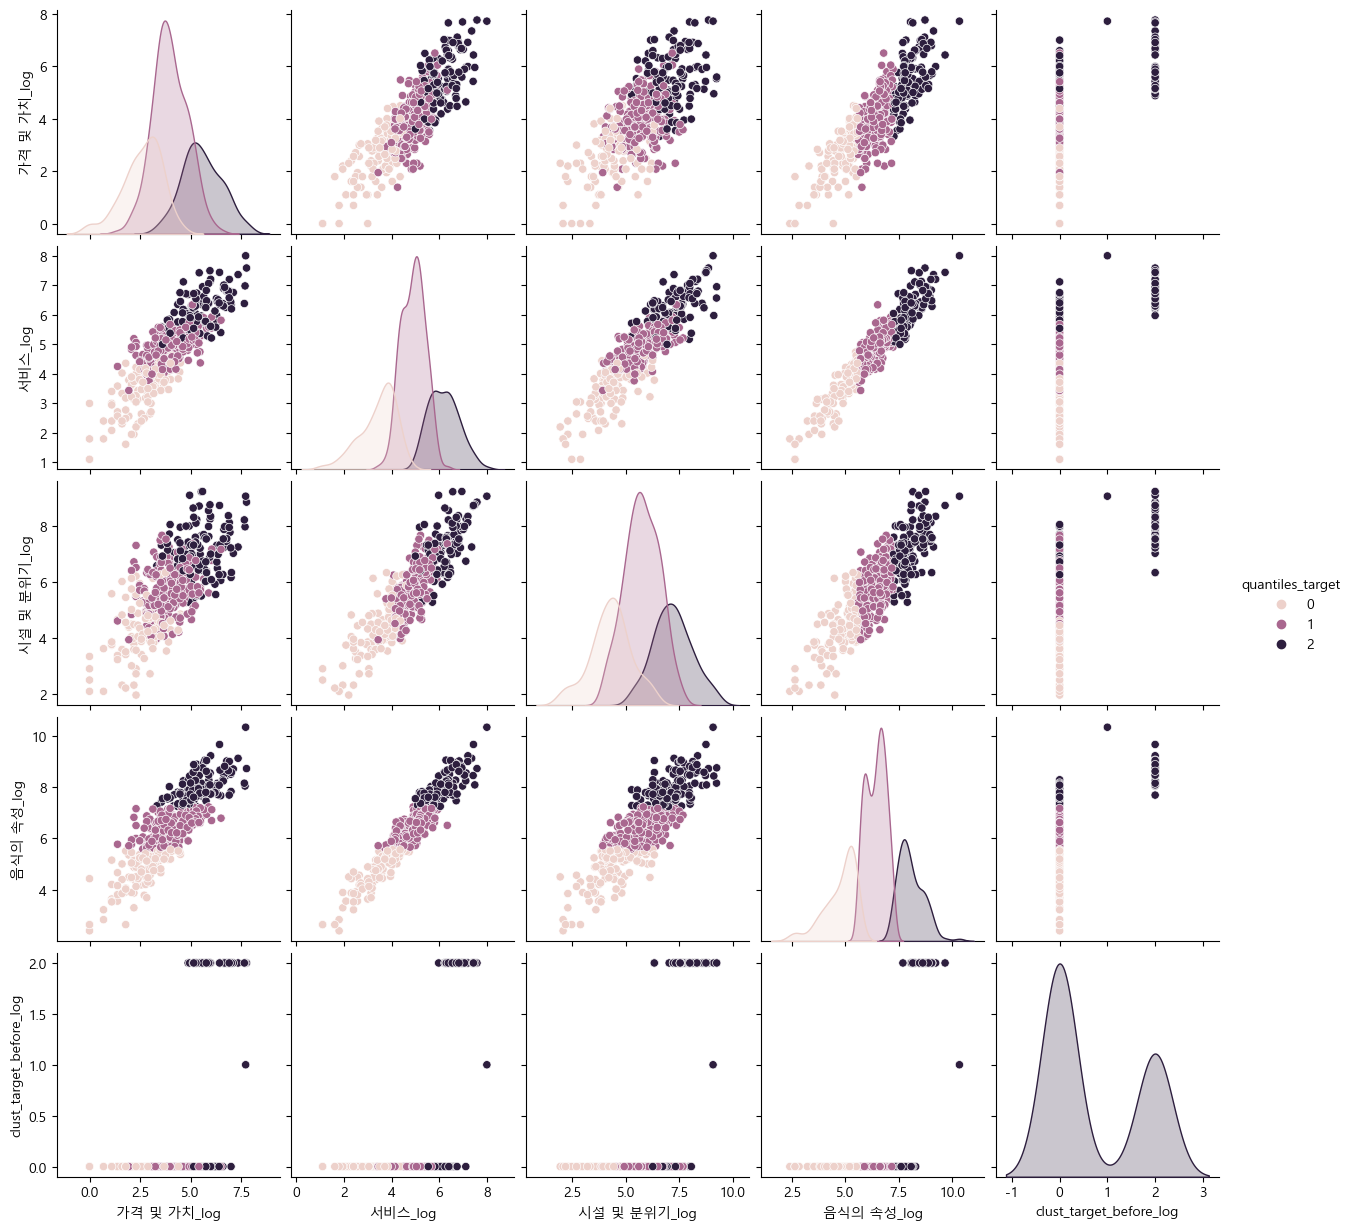

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(food_log_pivot, hue="quantiles_target")
plt.show()

로그 변환 후 pairplot - 로그 변환 전 군집 타겟 기준

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

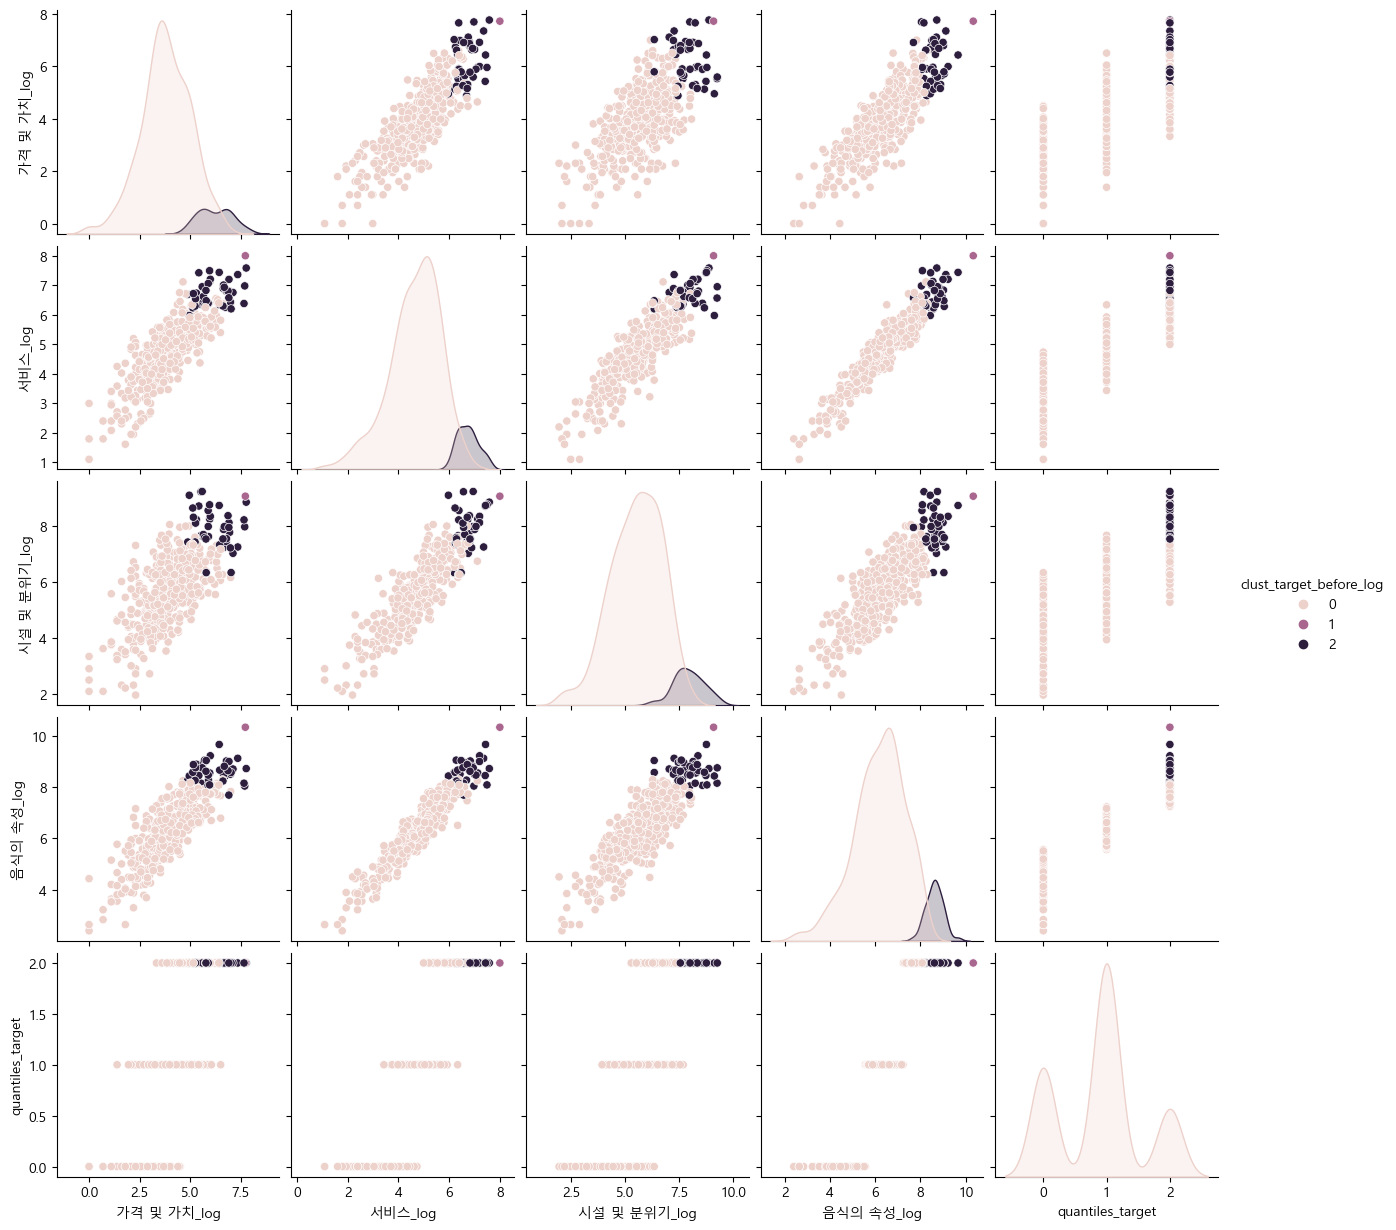

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(food_log_pivot, hue="clust_target_before_log")
plt.show()

K-Means cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

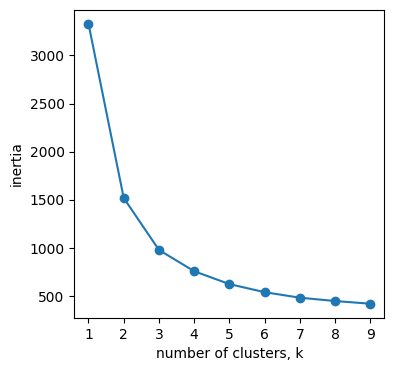

In [ ]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(food_log_pivot)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 )# 클러스터 갯수

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(food_log_pivot) # unsupervised learning

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(food_log_pivot) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

          0         1         2         3         4             5
0  5.663373  6.206989  7.207380  7.999385  1.905172  3.706897e-01
1  3.962266  4.892568  5.787303  6.420095  1.000000 -8.326673e-17
2  2.534303  3.416309  4.216636  4.786837  0.094017  8.326673e-17
[2 0 1 2 1 1 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# 원래 데이터에 예측된 군집 붙이기
clust_food_log = food_log_pivot.copy()
clust_food_log['clust'] = pred
clust_food_log.head()

Category_Map,가격 및 가치_log,서비스_log,시설 및 분위기_log,음식의 속성_log,target,clust_before,clust
Attraction,,,,,,,
1940금문,1.945910,3.784190,4.382027,5.351858,0,0,2
63뷔페 파빌리온,7.771910,7.588324,8.868132,8.722254,2,1,0
BK볏짚 우대갈비 장안동본점,4.143135,5.655992,6.313548,6.788972,1,0,1
RSG 성수,0.000000,1.098612,2.890372,2.639057,0,0,2
WANGTHAI,3.465736,5.159055,5.837730,6.342121,1,0,1


In [ ]:
clust_food_log['target'].value_counts()

target
1    223
0    114
2    113
Name: count, dtype: int64

정규화하지 않고 정규화시, 문제

In [ ]:
clust_food_log['clust_before'].value_counts()

clust_before
0    408
1     41
2      1
Name: count, dtype: int64

In [ ]:
clust_food_log['clust'].value_counts()

clust
1    217
2    117
0    116
Name: count, dtype: int64

In [ ]:
# 스케일링 전 데이터의 군집
pd.crosstab(clust_food_log['target'],clust_food_log['clust'])



clust,0,1,2
target,,,
0,0,110,3
1,9,6,209
2,106,0,7


In [ ]:
# scaling하지 않은 데이터를 학습하고 시각화하기

plt.figure(figsize=(100,100))

X = clust_food_log

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=clust_food_log, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=clust_food_log, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=clust_food_log, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)
####
plt.subplot(134)
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,0], data=clust_food_log, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,1], centers[:,0], c='black', alpha=0.8, s=150)

plt.subplot(135)
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,2], data=clust_food_log, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150)

plt.subplot(136)
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,3], data=clust_food_log, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,1], centers[:,3], c='black', alpha=0.8, s=150)
##
plt.subplot(137)
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,0], data=clust_food_log, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,2], centers[:,0], c='black', alpha=0.8, s=150)

plt.subplot(138)
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,1], data=clust_food_log, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,2], centers[:,1], c='black', alpha=0.8, s=150)

plt.subplot(139)
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,3], data=clust_food_log, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,2], centers[:,3], c='black', alpha=0.8, s=150)

plt.show()

ValueError: num must be an integer with 1 <= num <= 3, not 4

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*arg

In [ ]:
clust_food_log[clust_food_log['clust'] == 0]

In [ ]:
clust_food_log[clust_food_log['clust'] == 1]

In [ ]:
clust_food_log[clust_food_log['clust'] == 2]